# Criando um modelo classificar e avaliação

Utilizando uma base de dados do busca de pé iremos criar um modelo para classificar e avaliar os comentários.

## Importando a base de dados

https://www.kaggle.com/code/abnerfreitas/nlp-buscape-data-ptbr-sentiment-analysis/input

In [20]:
import pandas as pd

avaliacoes = pd.read_csv('b2w.csv')

In [9]:
avaliacoes.head()

,original_index,review_text,review_text_processed,review_text_tokenized,polarity,rating,kfold_polarity,kfold_rating
0,11955,Bem macio e felpudo...recomendo. Preço imbatí...,bem macio e felpudo...recomendo. preco imbati...,"['bem', 'macio', 'felpudo', 'recomendo', 'prec...",1.0,4,1,1
1,35478,Produto excepcional! recomendo!!! inovador e ...,produto excepcional! recomendo!!! inovador e ...,"['produto', 'excepcional', 'recomendo', 'inova...",1.0,5,1,1
2,122760,recebi o produto antes do prazo mas veio com d...,recebi o produto antes do prazo mas veio com d...,"['recebi', 'produto', 'antes', 'do', 'prazo', ...",0.0,1,1,1
3,17114,Bom custo beneficio. Adequado para pessoas que...,bom custo beneficio. adequado para pessoas que...,"['bom', 'custo', 'beneficio', 'adequado', 'par...",1.0,5,1,1
4,19112,Além de higiênico tem o tamanho ideal. Só falt...,alem de higienico tem o tamanho ideal. so falt...,"['alem', 'de', 'higienico', 'tem', 'tamanho', ...",NaN,3,-1,1


## Limpeza da base de dados

Retirando as colunas que não são necessárias.

In [21]:
avaliacoes = avaliacoes.drop(['original_index', 'review_text_processed', 'review_text_tokenized', 'rating', 'kfold_polarity', 'kfold_rating'], axis=1)

In [22]:
avaliacoes.head()

,review_text,polarity
0,Bem macio e felpudo...recomendo. Preço imbatí...,1.0
1,Produto excepcional! recomendo!!! inovador e ...,1.0
2,recebi o produto antes do prazo mas veio com d...,0.0
3,Bom custo beneficio. Adequado para pessoas que...,1.0
4,Além de higiênico tem o tamanho ideal. Só falt...,NaN


Remevendo as colunas com valores nulos.

In [23]:
avaliacoes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132373 entries, 0 to 132372
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   review_text  132373 non-null  object 
 1   polarity     116058 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.0+ MB


In [27]:
avaliacoes.isnull().all().count().sum()

2

In [31]:
avaliacoes.dropna(inplace=True, axis=0)
avaliacoes

,review_text,polarity
0,Bem macio e felpudo...recomendo. Preço imbatí...,1.0
1,Produto excepcional! recomendo!!! inovador e ...,1.0
2,recebi o produto antes do prazo mas veio com d...,0.0
3,Bom custo beneficio. Adequado para pessoas que...,1.0
5,"ótmo produto atendeu as expectativas, a entreg...",1.0
...,...,...
132367,"Ótimo jogo, um dos melhores que joguei. Entreg...",1.0
132368,SMARTHPHONE PERFEITO MUITO BOM E A ECONO...,1.0
132369,Eu estou muito chateado com isso gostaria que ...,0.0
132371,O produto anunciado no site dizia ser 100% al...,0.0


In [32]:
# avaliacoes.polarity.value_counts()
avaliacoes['polarity'].value_counts()

polarity
1.0    80300
0.0    35758
Name: count, dtype: int64

## Separando os dados de treino e teste

In [37]:
from sklearn.model_selection import train_test_split

treino, teste, classe_treino, classe_teste = train_test_split(avaliacoes.review_text, avaliacoes.polarity,
                                                              stratify=avaliacoes.polarity,
                                                              random_state=71)

In [38]:
classe_teste

70278     1.0
115089    1.0
128187    0.0
68697     0.0
50025     1.0
         ... 
25617     1.0
106407    1.0
26220     1.0
109010    0.0
49437     0.0
Name: polarity, Length: 29015, dtype: float64

## Criando um modelo

In [39]:
# Linear Model - Logistic Regression
# from sklearn.linear_model import LogisticRegression

# regressao_ligistica = LogisticRegression()
# regressao_ligistica.fit(treino, classe_treino)
# acuracia = regressao_ligistica.score(teste, classe_teste)
# print(acuracia)

ValueError: could not convert string to float: 'Simples e eficiente, bateria bastante durável, ótimo custo benefício para uso básico.'

In [40]:
# bag of words
from sklearn.feature_extraction.text import CountVectorizer

texto = ['Este produto é muito bom', 'Este produto é muito ruim']
vetorizar = CountVectorizer()
bag_of_words = vetorizar.fit_transform(texto)

In [41]:
bag_of_words

<2x5 sparse matrix of type '<class 'numpy.int64'>'
	with 8 stored elements in Compressed Sparse Row format>

In [43]:
matriz_esparsa = pd.DataFrame.sparse.from_spmatrix(bag_of_words, columns=vetorizar.get_feature_names_out())

In [44]:
matriz_esparsa

,bom,este,muito,produto,ruim
0,1,1,1,1,0
1,0,1,1,1,1


Vamos aplicar o bag of words na nossa base

In [46]:
vetorizar = CountVectorizer()
bag_of_words = vetorizar.fit_transform(avaliacoes.review_text)
print(bag_of_words.shape)

(116058, 50508)


116058 -> quatidade de linhas<br/>
50508 -> quantidade de palavras únicas

In [47]:
vetorizar = CountVectorizer(max_features=100) # max_features -> limitando para as 100 palavras que mais se repetem
bag_of_words = vetorizar.fit_transform(avaliacoes.review_text)
print(bag_of_words.shape)

(116058, 100)


In [50]:
from sklearn.linear_model import LogisticRegression

treino, teste, classe_treino, classe_teste = train_test_split(bag_of_words,
                                                              avaliacoes.polarity,
                                                              stratify=avaliacoes.polarity,
                                                              random_state=71)

regressao_logistica = LogisticRegression()
regressao_logistica.fit(treino, classe_treino)
acuracia = regressao_logistica.score(teste, classe_teste)
print(acuracia)

0.8870239531276926


In [52]:
from sklearn.linear_model import LogisticRegression

def treinar_modelo(dados, coluna_texto, coluna_sentimento):
  vetorizar = CountVectorizer(max_features=100) # max_features -> limitando para as 100 palavras que mais se repetem
  bag_of_words = vetorizar.fit_transform(dados[coluna_texto])

  treino, teste, classe_treino, classe_teste = train_test_split(bag_of_words,
                                                              dados[coluna_sentimento],
                                                              stratify=dados[coluna_sentimento],
                                                              random_state=71)

  regressao_logistica = LogisticRegression()
  regressao_logistica.fit(treino, classe_treino)
  return regressao_logistica.score(teste, classe_teste)


In [53]:
print(treinar_modelo(avaliacoes, 'review_text', 'polarity'))

0.8870239531276926


# World Cloud

Visualizando as principais reviews com uma word cloud.

https://github.com/amueller/word_cloud

In [69]:
from wordcloud import WordCloud

todas_avaliacoes = [texto for texto in avaliacoes.review_text]
todas_palavras = ' '.join(todas_avaliacoes)

In [70]:
len(todas_avaliacoes)

116058

In [71]:
len(todas_palavras)

16570763

In [72]:
nuvem_palavras = WordCloud().generate(todas_palavras)

In [73]:
nuvem_palavras

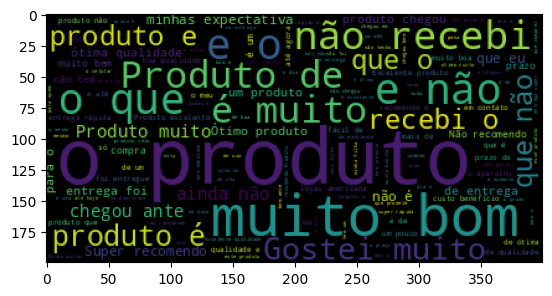

In [75]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(nuvem_palavras)

In [77]:
nuvem_palavras = WordCloud(width=800, height=500, max_font_size=110).generate(todas_palavras)

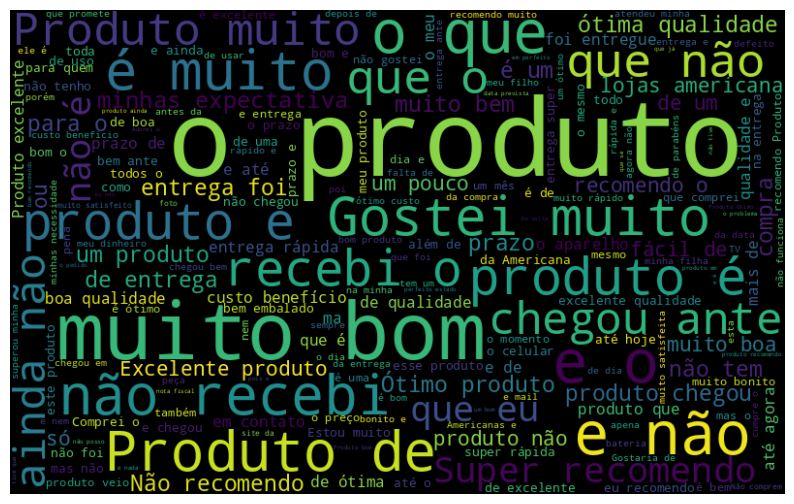

In [79]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.imshow(nuvem_palavras, interpolation='bilinear')
plt.axis('off')
plt.show()

## Avaliações negativas e positivas

In [86]:
def word_cloud_neg(dados, coluna_texto):
  texto_negativo = dados.query('polarity == 0')
  todas_avaliacoes = [texto for texto in texto_negativo[coluna_texto]]
  todas_palavras = ' '.join(todas_avaliacoes)
  # collocations -> retira as palvras em conjunto (ex: muito bom) e deixa somente palavras únicas
  nuvem_palavras = WordCloud(width=800, height=500, max_font_size=110, collocations=False).generate(todas_palavras)

  plt.figure(figsize=(10, 7))
  plt.imshow(nuvem_palavras, interpolation='bilinear')
  plt.axis('off')
  plt.show()

In [87]:
def word_cloud_pos(dados, coluna_texto):
  texto_positivo = dados.query('polarity == 1')
  todas_avaliacoes = [texto for texto in texto_positivo[coluna_texto]]
  todas_palavras = ' '.join(todas_avaliacoes)
  # collocations -> retira as palvras em conjunto (ex: muito bom) e deixa somente palavras únicas
  nuvem_palavras = WordCloud(width=800, height=500, max_font_size=110, collocations=False).generate(todas_palavras)

  plt.figure(figsize=(10, 7))
  plt.imshow(nuvem_palavras, interpolation='bilinear')
  plt.axis('off')
  plt.show()

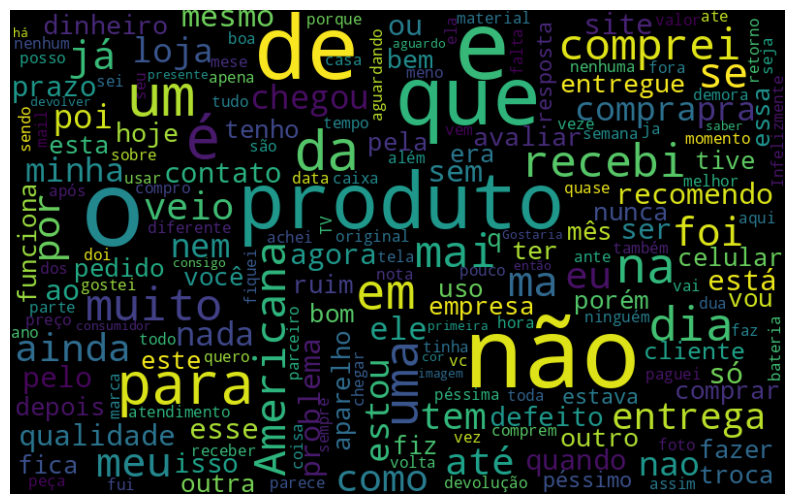

In [88]:
word_cloud_neg(avaliacoes, 'review_text')

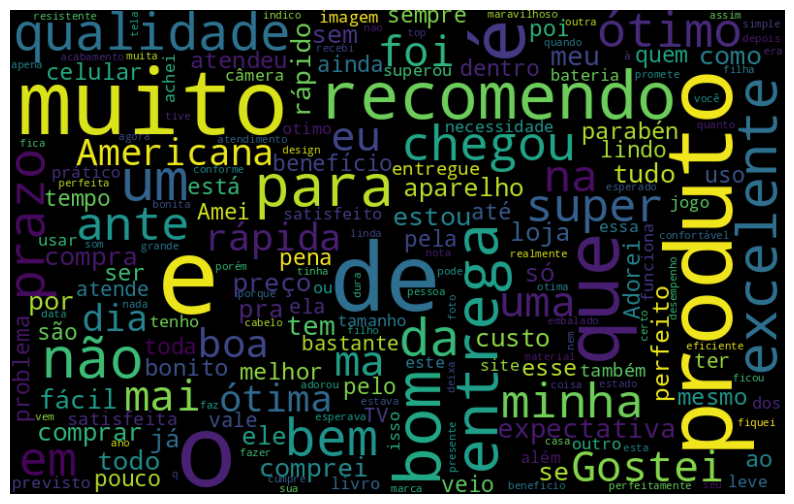

In [89]:
word_cloud_pos(avaliacoes, 'review_text')

OBS: nos gráficos existem as **stop words**, que são palavras que não fazem muito sentido na avalição do gráfico. Ex: na, dos, ao, já, ...